# Coppersmith Theorem

Credit: [20 Years of Attacks on the RSA Cryptosystem](https://crypto.stanford.edu/~dabo/pubs/papers/RSA-survey.pdf) (Dan Boneh)

## RSA in nutshell

RSA is most famous public cryptography algorithm using pow operation on integer in module $n$, the security of RSA relies on the practical difficulty of factoring the product of two large prime numbers, the "factoring problem". 

### Key generation

The keys for the RSA algorithm are generated in the following way:

1. Choose two prime numbers $p, q$
2. Compute module $n = p \cdot q$ and its totient $\phi(n) = (p-1) \cdot (q-1)$
3. Choose an integer $e$ such as $1 \lt e \lt \phi(n)$ and $GCD(e, \phi(n)) = 1$
4. Compute private key using **modular multiplicative inverse** $d = e^{-1} \mod \phi(n)$

### Key distribution

Suppose that Bob wants to send information to Alice. If they decide to use RSA, Bob must know Alice's public key to encrypt the message, and Alice must use her private key to decrypt the message. 

### Encryption

After Bob obtains Alice's public key, he can send a message $M$ to Alice as follow:

$$C = M^e \mod n \text{ using } M \lt n$$

### Decryption

Alice can recover $M$ from $C$ by using her private key exponent $d$ by computing:

$$C^d = (M^e)^d = M \mod n$$

### Why private key cannot be reversed ?

Choosing $d$ as inverse $e$ in modulo:

$$ d = e^{-1} \mod \phi(N)$$

In order to calculate $d$, it need to known Euler Totien $\phi(N)$, so to calculate it then it need factorise $N$ in $p,q$. In number theory, the **general number field sieve** (GNFS) is the most efficient classical algorithm known for factoring integers larger than $10^{100}$, its complexity is in order $O^{\log(n)\cdot\log(\log(n))}$

## Coppersmith Theorem

The most powerful attacks on low public exponent RSA are based on a theorem due to Coppersmith, the proof uses the LLL lattice basis reduction algorithm.

**Let** $N \in \mathbb{Z}$ be an integer and $f \in \mathbb{Z}[x]$ be a monic polynomial of degree $d$:

$$f(x) = x^d + a_{d-1}x^{d-1}+...+a_1x+a_0$$

**Then** given $X = N^{\frac{1}{d} - \varepsilon}$ with $\forall \varepsilon \gt 0$, attacker can effieciently find all integer roots $|x_0| \lt X$:

$$f(x_0) \mod N = 0$$

The running time is dominated by the time it takes to run the LLL algorithm on a lattice of dimension $O(w)$ with $w = \min(\frac{1}{\varepsilon}; \log_2{N} )$. The theorem provides an algorithm for efficiently finding all roots of $p$ modulo $N$ that are less than $X = N^{\frac{1}{d}}$, as $X$ gets smaller, the algorithm's running time decreases.

### Lemma

**Let** $h(x) = \in \mathbb{Z}$ be a polynomial of degree $d$ and $X$ be a positive integer.

$$h(x) = \sum_i{a_ix^i}$$

Defining $\left\|h(x)\right\|^2 = \sum_i{|a_i|^2}$, then $\left\|h(xX)\right\| = \sum_i{|a_iX^i|^2}$, so below **if-then** relationship can be proved:

$$\left\|h(xX)\right\| \lt \frac{N}{\sqrt{d}} \implies h(x_0) = 0 \text{ holds over the integers}$$

The lemma states that if $h$ is a polynomial with low norm, then all small roots of $h \mod{N}$ are also roots of $h$ over the integers.

#### Proof

Using Schwarz inequality:

$$|h(x_0)| = |\sum_{i=1}^{m} {a_{i}} \cdot {x_0^i}| = |\sum_{i=1}^{m} {a_{i}} \cdot {X^i} \cdot \frac{x_0^i} {X^i}| \leq \sum_{i=1}^{m} |{a_{i}} \cdot {X^i} \cdot \frac{x_0^i} {X^i}| \leq \sum_{i=1}^{m} |a_i \cdot X^i| \leq \sqrt{d}\cdot \Vert h(xX) \Vert \lt N$$

Since $h(x_0) = 0 \mod{N}$, we conclude that $h(x_0) = 0$.

The lemma states that if $h$ is a polynomial with low norm, then all small roots of $h \mod{N}$ are also roots of $h$ over the integers.




## Lattice

In geometry and group theory, a **lattice** in the real coordinate space $\mathbb {R} ^{n}$ is an infinite set of points in this space with the properties that coordinatewise addition or subtraction of two points in the lattice produces another lattice point, that the lattice points are all separated by some minimum distance.

A lattice can be described as a free abelian group of dimension $n$ which spans the vector space $\mathbb {R} ^{n}$. For any basis of $\mathbb {R} ^{n}$, the subgroup of all linear combinations with integer coefficients of the basisvectors $B = \{b_1, ..., b_w\}$ forms a lattice, and every lattice can be formed from a basis in this way. 

$$ L = \left\{\sum_{i=1}^n n_i \cdot b_i : n_i \in \mathbb{Z} \right\}$$

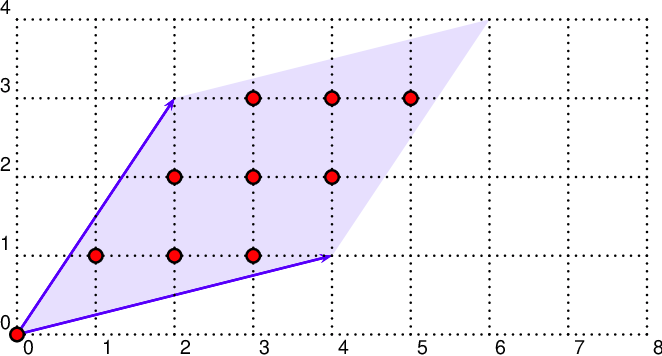

All basisvectors have same number of coefficient, that is dimension of lattice $dim(L)$.

If $dim(L) \gt 2$, then infinite basisvectors exists correlated by integer matrix and each determinant equals $\pm 1$ and Gram's determinant $\det_{i \leq i,j \leq d}\langle b_i,b_j \rangle$ is same.

**Gram Matrix** $G$ of set of vectors $b_1,...b_n$ is a Hermitian matrix of inner products
$$G_{ij} = \langle b_i,b_j \rangle$$

Lattice volume is defined as parallelepiped's volume generated by set of vectors $b_i$:

$$vol(L) = \sqrt{\det(G)}=\sqrt{\det_{i \leq i,j \leq d}\langle b_i,b_j \rangle}$$

If $dim(L) = 2$ then, lattice's volume is defined by determinant of squared matrix $w \times w$ defined basis vector as column.

### Algorithm LLL

Algorithm LLL (Lovasz, Lenstra, Lenstra Jr.) is find to search basisvector whom has minimum norm of all lattice's basisvector, defined as **reduced base**.

All basisvector have same determinant except sign, then all vectorbasis are nearly orthogonal each other and this is idea behind of Algorithm LLL.

#### Case $dim(L) = 2$
**Let** $B = \{b_1,...,b_n \}$ is lattice reduced base where $\det(B) = \det(L)$, **then**:

1. $ \det(L) \leq  \prod_{i=1}^N \Vert b^{*}_i \Vert \leq 2^{n(n-1)/4}\det(L)$

2. $ \Vert b^{*}_i \Vert \leq 2^{(i-1)/2} \Vert b^{*}_j \Vert \text{    }\forall i,j : 1 \leq i \leq j \leq n$

3. $ \Vert b_i \Vert \leq 2^{(n-1)/4}\det(L)$

4. $ \Vert b_i \Vert \leq 2^{(i-1)/2} \Vert x \Vert \text{    }\forall x \in L : x \neq \underline{0}$

5. $ \Vert b_i \Vert \leq 2^{(i-1)/2} \max(\Vert x_1 \Vert,...,\Vert x_t \Vert) \text{    } \forall x_1,...,x_t \in L : \text{ are linear indipendent} $


**Let** $(v_1,v_2)$ is a basisvector with $\Vert v_1 \Vert \leq \Vert v_2 \Vert$. 

In order to find a reduced base, basic idea is to substitute $v_2$ to $v^{*}_2$ orthogonal to $v_1$, using **Gram-Schmidt** procedure:

$$ v^{*}_2 = v_2 \frac{v_1 \cdot v_2}{v_1 \cdot v_1}v_1$$

$v^{*}_2$ is orthogonal to $v_1$, but $v^{*}_2$ could not belong to lattice, so procedure must be reiterate to find $(v_1,v^{*}_2)$ as vectorbasis.

Algorithm LLL determines $t$ as nearest integer to $\frac{v_1 \cdot v_2}{v_1 \cdot v_1}$ and substitute basisvector:

$$\{v_1,v_2 -tv_1\}$$

Reiterate process until :

$$-\frac{1}{2} \lt \frac{v_1 \cdot v_2}{v_1 \cdot v_1} \lt \frac{1}{2} \text{ con } \Vert v_1\Vert \lt \Vert v_2\Vert  $$

## Coppersmith Attack

Coppersmith idea is to search polinomy $g(x) \in \mathbb{Z}[n]$ such as $h(x) = g(x)\cdot f(x)$ with norm smaller than $\frac{N}{\sqrt{d}}$ with same roots as $f(x)$, so integer roots can be found using Coppersmith theorem and LLL algorithm.

This amounts to searching for an integer linear combination of the polynomials $f, x \cdot f , x^2\cdot f,..., x^r\cdot f$ with low norm, most often there is no nontrivial linear combination with succiently small norm.

Coppersmith found a trick to solve the problem: 

$$f(x_0) = 0 \mod{N} \implies f(x_0)^k = 0 \mod {N^k} \forall K$$ 

More generally, **let** $g(x)$ is below polynomial form:

$$g_{u,v}(x) = N^{m-v}\cdot x^u\cdot f(x)^v$$
$$\forall u,v \in N: u \geq 0 \land 0 \leq v \leq m$$ 

For any fixes $m$, below**if-then** relationship can be proved:

$$f(x_0) = 0 \mod N \implies g_{u,v}(x_0) = 0 \mod N^m$$

Thanks to the relaxed upper bound on the norm ($N^m$ rather than $N$), one can show that for sufficiently large $m$, there always exists a linear combination $h(x)$ satisfying the required bound.

So it is necessary to find $h(x)$ attraverso i polinomi $g_{u,v}(x)$, such as $\left\|h(xX)\right\| \lt \frac{N^m}{\sqrt{d}}$, in according to Coppersmith lemma then $x_0$ root of $h(x)$ is a root over all integer and root of $f(x)$ over all integers.


### Lattice Polynomial

**Let** full-rank lattice $L$, spanned by basisvector $\{u_1,...,u_w\}$, **then** determinant of $L$ is defined by determinant of squared matrix $w \times w$ whose rows are the vectors $u_1,...,u_w$ .

In our case, we can view polynomials $g_{u,v}(xX)$ as vector and study lattice $L$ spanned by those polynomies. 

**Let** $v = 0, ..., m$ and $u= 0,..., d-1$ **then**, lattice $L$ dimension is $w = d(m+1)$.

For example let be $p$ a quadratic monic polinomial and $m = 3$, the resulting lattice is spanned by the rows of the following matrix:

$$g_{u,v}(x) = N^{m-v}x^u f(x)^v \text{ with } f(x) = x^2 \text{ quadratic monic polinomial}$$
$$g_{0,0}(xX) = N^{(3-0)}x^0f(x)^0 = N^3$$
$$g_{1,0}(xX) = N^{(3-0)}x^1f(x)^0 = XN^3$$
$$g_{0,1}(xX) = N^{(3-1)}x^0f(x)^1 = X^2N^2$$
$$g_{1,1}(xX) = N^{(3-1)}x^1f(x)^1 = X^3N^2$$
$$g_{0,2}(xX) = N^{(3-2)}x^0f(x)^2 = X^4N$$
$$g_{1,2}(xX) = N^{(3-2)}x^1f(x)^2 = X^5N$$
$$g_{0,3}(xX) = N^{(3-3)}x^0f(x)^3 = X^6$$
$$g_{1,3}(xX) = N^{(3-3)}x^1f(x)^3 = X^7$$

$$
\begin{bmatrix}
    N^3       \\
    & XN^3 \\
    * & * & X^2N^2\\
    & * & * & X^3N^2 \\
    * & * & * & * & X^4N\\
    & * & * & * & * & X^5N\\
    *& * & * & * & * & * & X^6\\
    &*& * & * & * & * & * & X^7\\
\end{bmatrix}
$$

Since matrix is triangular matrix, then its determinant is defined by diagonal elements, so all $*$ elements can be ignored.


### Apply LLL

Applying Algorithm LLL, in according with lemma 3, we can find a reduced base $v \in L$ satisfying:

$$ \Vert v \Vert \leq 2^{w/4}\det(L)$$

where $w = d(m + 1)$ is the dimension of L.

A routine calculation shows that for large enough $m$ the bound is satisfied:

$$2^{w/4}\det(L) \lt \frac{N^m}{\sqrt{d}}$$

**Then** reduced base $v$ is a solution to coppersmith problem because:

$$\left\|h(xX)\right\| \lt \frac{N^m}{\sqrt{d}}$$

## Coppersmith Attacks Example - Stereotyped Message

Sage Framework implements Coppersmith Attack Algorithm using 
```python
small_roots(self,X=None, beta=1.0, epsilon=None, **kwds)
```

Where

- **X** is upper bound for root search (default $X$ auto-evaluation)

- **beta** is fixed $m$ for root search (default $\beta=1$)

- **epsilon** parameter to evaluate automatically $X$ upperbound (default $\varepsilon = \frac{\beta}{8}$)

$$ X = \left\lceil \frac{N^{\frac{2\beta}{\varepsilon}}}{2} \right\rceil$$

### UTCTF2021 - A Bit Weird

```python
from Crypto.Util import number
from secret import flag
import os

length = 2048
p, q = number.getPrime(length//2), number.getPrime(length//2)
N = p*q
e = 3

m = number.bytes_to_long(flag)
x = number.bytes_to_long(os.urandom(length//8))

c = pow(m|x, e, N)
print('N =', N);
print('e =', e);
print('c =', c);
print('m&x =', m&x);
print('x =', x);
```

In [36]:
N = 13876129555781460073002089038351520612247655754841714940325194761154811715694900213267064079029042442997358889794972854389557630367771777876508793474170741947269348292776484727853353467216624504502363412563718921205109890927597601496686803975210884730367005708579251258930365320553408690272909557812147058458101934416094961654819292033675534518433169541534918719715858981571188058387655828559632455020249603990658414972550914448303438265789951615868454921813881331283621117678174520240951067354671343645161030847894042795249824975975123293970250188757622530156083354425897120362794296499989540418235408089516991225649
e = 3
c = 6581985633799906892057438125576915919729685289065773835188688336898671475090397283236146369846971577536055404744552000913009436345090659234890289251210725630126240983696894267667325908895755610921151796076651419491871249815427670907081328324660532079703528042745484899868019846050803531065674821086527587813490634542863407667629281865859168224431930971680966013847327545587494254199639534463557869211251870726331441006052480498353072578366929904335644501242811360758566122007864009155945266316460389696089058959764212987491632905588143831831973272715981653196928234595155023233235134284082645872266135170511490429493
m_and_x = 947571396785487533546146461810836349016633316292485079213681708490477178328756478620234135446017364353903883460574081324427546739724
x  = 15581107453382746363421172426030468550126181195076252322042322859748260918197659408344673747013982937921433767135271108413165955808652424700637809308565928462367274272294975755415573706749109706624868830430686443947948537923430882747239965780990192617072654390726447304728671150888061906213977961981340995242772304458476566590730032592047868074968609272272687908019911741096824092090512588043445300077973100189180460193467125092550001098696240395535375456357081981657552860000358049631730893603020057137233513015505547751597823505590900290756694837641762534009330797696018713622218806608741753325137365900124739257740

#### Solution

Given a look to number's length: 

In [37]:
print("N = %d bits" % int(N).bit_length())
print("c = %d bits" % int(c).bit_length())
print("m&x = %d bits" % int(m_and_x).bit_length())
print("x = %d bits" % int(x).bit_length())

N = 2047 bits
c = 2046 bits
m&x = 439 bits
x = 2047 bits


Note that $x$ is more greater than crypted message $c = (m|x)^e \mod{N}$, then first $2047 - 439 = 1608$ bits of message can be recovered using m&x variable.

Most of the text is known $x$ ($\frac{1608}{2047}$ bits) ed $e = 3$ is enough smaller, then it is possible use Coppersmith Theorem in order decrypt the whole ciphertext.

$$ (x+y)^e \mod N$$

In [38]:
unknown_bits = int(m_and_x).bit_length() 
known_x  = (x >> unknown_bits) << unknown_bits

Message is calculated as:

$M^e = C \mod{N} $

$M^e - C = 0 \mod {N}$

$ (x+y)^e - C = 0 \mod {N}$

Using coppersmith theorem $y$ can be evaluated as root of polynomial:

In [39]:
P.<y> = PolynomialRing(Zmod(N))
pol = (known_x + y)^e - c
f = pol.monic()
beta = 2/3
epsilon = beta * beta / 7
m_or_x = f.small_roots(X=2 ^ unknown_bits ,beta=beta, epsilon=epsilon)[0]
m_or_x 

1302786255172809348903083671762545816851509465261237799745282435972339495760259999870768350015069248972160348364210110655594430982141

Using m|x and m&x, then $m$ can be recovered through boolean logic:

$$m = (m \lor x) \oplus (m \land x) $$

In [40]:
m = (int(m_or_x) ^^ int(bin(x)[-439:],2)) ^^ int(m_and_x)
bytes.fromhex(hex(m)[2:])

b'utflag{C0u1dNt_c0m3_uP_w1tH_A_Cl3veR_f1aG_b61a2defc55f}'

### UIUCTF - PapaRSA

```python
from Crypto.PublicKey import RSA

key = RSA.generate(4096, e=5)
msg = "this challenge was supposed to be babyrsa but i screwed up and now i have to redo the challenge.\nhopefully this challenge proves to be more worthy of 250 points compared to the 200 points i gave out for babyrsa :D :D :D\nyour super secret flag is: XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\nyou know what i'm going to add an extra line here just to make your life miserable so deal with it"
m = int(msg.encode("hex"), 16)
c = pow(m, key.e, key.n)

f = open("paparsa.txt", "w")
print >> f, "n = {}".format(key.n)
print >> f, "e = {}".format(key.e)
print >> f, "c = {}".format(c)
```

In [41]:
n = 805467500635696403604126524373650578882729068725582344971555936471728279008969317394226798274039587275908735628164913963756789131471531490012281262137708844664619411648776174742900969650281132608104486439462068493207388096754400356209191212924158917441463852311090597438686723680422989566039830705971272945580630621308622704812919416445637277433384864510484266136345300166188170847768250622904194100556098235897898548354386415341541887443486684297114240486341073977172459860420916964212739802004276614553755113124726331629822694410052832980560107812738167277181748569891715410067156205497753620739994002924247168259596220654379789860120944816884358006621854492232604827642867109476922149510767118658715534476782931763110787389666428593557178061972898056782926023179701767472969849999844288795597293792471883445525249025377326859655523448211020675915933552601140243332965620235850177872856558184848182439374292376522160931072677877590262080551636962148104050583711183119856867201924407132152091888936970437318064654447142605921825771487108398034919404885812834444299826080204996660391375038388918601615609593999711720104533648851576138805705999947802739408729788376315233147532770988216608571607302006681600662261521288802804512781133
e = 5
c = 321344338551168130701947757669249162791535374419225256466002854387287697945811581844875867845545337575193797350159207497966826027124926618458827324785590115214765980153475875175895244152171945352397663605222668892070894285036685408001675776259216704639659684767335997326195127379070104670798191048101430782486785148455557975065509824478935393935463232461294974471055239751453456270779997852527271795223623224696998441762750417393944955667837832299195592347653873362173157136283926817115042942127695355760288879165245940595259284499711202547364332122472169897570069773912201877037737474884548477516093671861643329899650704311880900221217905929830674467383904928054908475945599046498840246878554674443087280023564313470872269644230953001876937807402083390603760508851259383686896871724061532464374712413952574633098739843484563001012414107193262431117290853995664646176812763789444386869148000606985026530596652927567162641583951775993815884965569050328445927871220492529331846189285588168127051152438658813934744257031316581112434690871286836998078235766836485498780504037745116357109237384369621143931229920342036890494878183569174869563857473355851368119174926388706612127773670862261189669510108216517652686402185979222505401328291
m = "this challenge was supposed to be babyrsa but i screwed up and now i have to redo the challenge.\nhopefully this challenge proves to be more worthy of 250 points compared to the 200 points i gave out for babyrsa :D :D :D\nyour super secret flag is: XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\nyou know what i'm going to add an extra line here just to make your life miserable so deal with it"

Basic idea is a stereotyped message, in which flag is in the middle. Last part of message is too much little in order to recover message, nevertheless first part of message is enough big in order to use Coppersmith Theorem to recover message, 

#### Solution

In [42]:
from Crypto.Util.number import bytes_to_long, long_to_bytes

m_1 = bytes_to_long(b"this challenge was supposed to be babyrsa but i screwed up and now i have to redo the challenge.\nhopefully this challenge proves to be more worthy of 250 points compared to the 200 points i gave out for babyrsa :D :D :D\nyour super secret flag is: ")
m_3 = bytes_to_long(b"\nyou know what i'm going to add an extra line here just to make your life miserable so deal with it")

l_1 = int(m_1).bit_length()
l_3 = int(m_3).bit_length()

print(l_1," ",l_3)
print(int(c).bit_length() )

1975   788
4095


##### Failed Attack

Difference of bit lenght does not return flag bit position:

In [43]:
int(c).bit_length() - l_1 - l_3

1332

In [44]:
P.<x> = PolynomialRing(Zmod(n))
f = (m_1 + x)^e - c
f = f.monic()
beta = 2/3
epsilon = beta * beta / 7
m_2 = f.small_roots(X=2 ^ 1337,beta=beta, epsilon=epsilon)
m_2

[]

Attack is failed.

##### Success Attack

Basic idea is find flag chars in the middle, so it is necessary set flag chars to null byte in order to find value to add to message using Coppersmith Theorem.

But where are flag bits?

In [45]:
l_3 + bytes_to_long(b"\n").bit_length()

792

Applying Coppersmith Theorem

In [46]:
m = m.replace('X','\x00')
P.<x> = PolynomialRing(Zmod(n))
f = (bytes_to_long(m.encode()) + (2**792)*x)^e - c
f = f.monic()
m_2 = f.small_roots(epsilon=1/8) # Default
m_2 = f.small_roots(epsilon=1/15) # Increase search

long_to_bytes(int(m_2[0]))

b'flag{bu7_0N_4_w3Dn3sdAy_iN_a_c4f3_i_waTcH3dD_17_6eg1n_aga1n}'